#### <span style='color:#7C93C3'>Assignment 5</span>
## <span style='color:#7C93C3'> Exploratory Data Analysis on Cardiotocographic Dataset</span>
##### Objective
    The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

## <span style='color:#6A9C89'>Tasks</span>
### <span style='color:#6A9C89'>1. Data Cleaning and Preparation</span>

In [55]:
# importing all the necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('Imported Successfully')

Imported Successfully


In [108]:
## importing warning library
import warnings
warnings.filterwarnings('ignore')
print('imported')

imported


##### <span style='color:#6A9C89'>i) Load the Dataset into a DataFrame or equivalent data structure</span>

In [56]:
## Load the dataset into a DataFrame.
df = pd.read_csv('Cardiotocographic.csv')

## head of the dataframe
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [57]:
## See statistics of the given dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [58]:
df.describe()

LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000142     0.000840    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2105.000000  2105.000000  2105.000000  2105.000000  
mean      8.284887    70.429260     0.316371     1.304507  
std       7.772858    42.931822     0.645622     0.644619  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.000000     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

In [59]:
df.shape

(2126, 14)

##### <span style='color:#6A9C89'>ii) Handle Missing Values</span>

In [60]:
## let's see the presence of missing values in the dataframe
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

There are 8 columns which have missing values. <br>
So, we can see that the total number of missing in each columns is about 20-21, and we have a dataset of shape 2126. <br>
So, we can replace the null-values with mean of the column.

In [61]:
## separting all the columns which have null values
null_cols = ['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP']

## Checking the data type the columns have
df[null_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   DS        2105 non-null   float64
 3   DP        2105 non-null   float64
 4   MLTV      2105 non-null   float64
 5   Width     2105 non-null   float64
 6   Tendency  2105 non-null   float64
 7   NSP       2105 non-null   float64
dtypes: float64(8)
memory usage: 133.0 KB


So, we can find the conclusion that all the columns with null values have float data type.<br>
We, can find the mean of each null columns and then replace it with the null values.

In [64]:
for col in null_cols:  # Iterate over the column names
    mean = np.mean(df[col])  # Compute the mean of the column data
    df[col].fillna(mean, inplace=True)  # Replace null values in-place
    print(f'Null values replaced for {col}')

Null values replaced for LB
Null values replaced for AC
Null values replaced for DS
Null values replaced for DP
Null values replaced for MLTV
Null values replaced for Width
Null values replaced for Tendency
Null values replaced for NSP


C:\Users\HP\AppData\Local\Temp\ipykernel_13532\868772559.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean, inplace=True)  # Replace null values in-place


In [65]:
## So, after replacing the null values let's again see if there is presence of null values
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [66]:
df.shape

(2126, 14)

So, we can see that there is no more presence of any null values in the dataframe.

##### <span style='color:#6A9C89'>iii) Ientify and correct any inconsistencies in data types</span>

In [67]:
## to check if there is a presence of in-consistent data type we can use info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


So, we don't have any in-consistency in the data types

##### <span style='color:#6A9C89'>iv) Detect and Treat Outliers if necessary</span>

In [68]:
def detect_outliers(data, column):
    # Finding 25th and 75th quantiles of the column
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    
    # Calculating interquartile range
    iqr = q3 - q1
    
    # Calculating lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Checking if there are any values outside the bounds
    if data[(data[column] < lower_bound) | (data[column] > upper_bound)].empty:
        return f"{column} has no outliers."
    else:
        return f"{column} has outliers."


In [69]:
## So, let's check which of the columns has outliers and which don't have any outliers
cols = df.columns
for col in df.columns:
    print(detect_outliers(df, col))

LB has outliers.
AC has outliers.
FM has outliers.
UC has outliers.
DL has outliers.
DS has outliers.
DP has outliers.
ASTV has outliers.
MSTV has outliers.
ALTV has outliers.
MLTV has outliers.
Width has outliers.
Tendency has outliers.
NSP has outliers.


The above function claims that all of the columns have outliers.

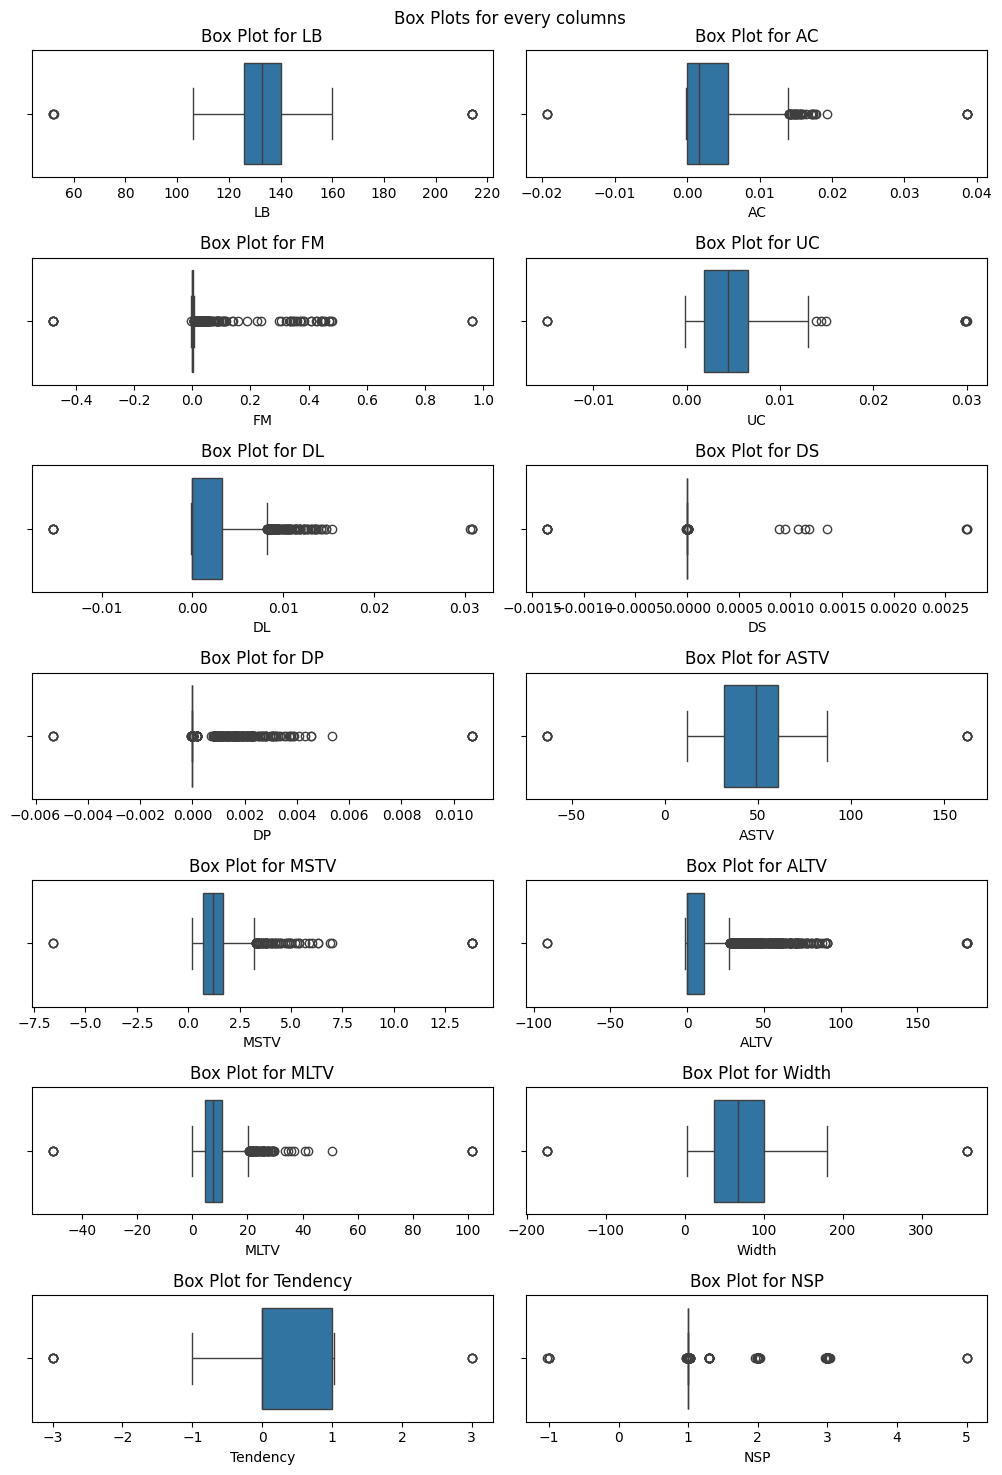

In [70]:
plt.figure(figsize=(10,15))
plt.suptitle('Box Plots for every columns')

for idx, col in enumerate(df.columns, 1):
    plt.subplot(7,2,idx)
    plt.title(f'Box Plot for {col}')
    sns.boxplot(data=df, x=col)
plt.tight_layout()
plt.show()

In [71]:
df.shape

(2126, 14)

In [72]:
## so let's figure out which columns need to be cleaned for outliers
## we will simply ignore those columns which dont have more of outliers
out_cols = ['AC', 'FM', 'DL', 'DP', 'MSTV', 'ALTV', 'MLTV']

In [73]:
def remove_outliers_iqr(data, columns, multiplier=1.5):
    data_cleaned = data.copy()
    for column in columns:
        Q1 = data_cleaned[column].quantile(0.25)
        Q3 = data_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]
    return data_cleaned.reset_index(drop=True)

In [74]:
df=remove_outliers_iqr(df, out_cols, multiplier=1.5)

In [75]:
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
0  132.0  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0  10.4   
1  133.0  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0  13.4   
2  122.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  83.0   0.5   6.0  15.6   
3  122.0  0.000000  0.0  0.002967  0.000000  0.0  0.0  86.0   0.3   6.0  10.6   
4  124.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  86.0   0.4  14.0   4.8   

        Width  Tendency  NSP  
0  130.000000       0.0  1.0  
1  130.000000       0.0  1.0  
2   69.920261       1.0  3.0  
3   68.000000       1.0  3.0  
4   24.000000      -1.0  3.0

In [76]:
df.shape

(1207, 14)

##### So, finally we don't have any outlier present in the whole dataset.

### <span style='color:#6A9C89'>2. Statistical Summary</span>

##### <span style='color:#6A9C89'>i) Provide statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range)</span> 

In [77]:
df.describe()

LB           AC           FM           UC           DL  \
count  1207.000000  1207.000000  1207.000000  1207.000000  1207.000000   
mean    133.643896     0.003370     0.000645     0.004612     0.001366   
std      11.449643     0.003651     0.001374     0.003279     0.002192   
min      51.842487    -0.000185    -0.002889    -0.014925    -0.000124   
25%     126.000000     0.000000     0.000000     0.002577     0.000000   
50%     134.000000     0.002210     0.000000     0.004757     0.000000   
75%     141.000000     0.005991     0.000836     0.006694     0.002276   
max     214.000000     0.013861     0.006105     0.030002     0.008464   

                DS      DP         ASTV         MSTV         ALTV  \
count  1207.000000  1207.0  1207.000000  1207.000000  1207.000000   
mean     -0.000001     0.0    45.463461     1.140090     6.548689   
std       0.000140     0.0    18.152566     0.533776    10.606023   
min      -0.001353     0.0   -63.000000     0.200000    -0.899870   
25%       0.000000     0.0    31.588802     0.700000     0.000000   
50%       0.000000     0.0    46.000000     1.100000     0.000000   
75%       0.000000     0.0    58.000000     1.500000     9.000000   
max       0.002706     0.0   162.000000     2.700000    40.000000   

              MLTV        Width     Tendency          NSP  
count  1207.000000  1207.000000  1207.000000  1207.000000  
mean      8.431550    63.194762     0.356266     1.139900  
std       4.167947    36.116064     0.634055     0.426432  
min      -0.136053  -174.000000    -3.000000    -1.000000  
25%       5.800000    36.500000     0.000000     1.000000  
50%       8.100000    56.910562     0.000000     1.000000  
75%      11.000000    90.000000     1.000000     1.000000  
max      19.800000   357.000000     3.000000     5.000000

##### <span style='color:#6A9C89'>ii) Highlight any interesting findings from this summary.</span>  

#### <span style='color:#DEAA79'>Key Insights </style>
##### <span style='color:#DEAA79'> 1) LB (Baseline Fetal Heart Rate): </style>
    Has a high level of central tendency with a mean and median also colse to each other, indicating symmetry.

##### <span style='color:#DEAA79'> 2) AC (Acceleration) and FM (Fetal Movement): </style>
    Both are highly skewed with small values for mean and median, likely indicating that their distribution in sominated by low values.

##### <span style='color:#DEAA79'> 3) ALTV (Long-Term Variablity): </style>
    Median is zero, but the mean in significantly higher, suggesting a highly skewed distribution.

##### <span style='color:#DEAA79'> 4) NSP (Class Label): </style>
    The mean of 1.30 suggests that a majority of the data points belong to the lower numerical class.

##### <span style='color:#DEAA79'> 5) Width: </style>
    Shows a wide range of values, as seen from its standard deviation and IQR.

##### <span style='color:#DEAA79'> 6) ASTV (Abnormal Short-Term Variablitly): </style>
    A high standard deviatin and IQR suggest variability in this measure.

### <span style='color:#6A9C89'>3. Data Vizualization</span>

##### <span style='color:#6A9C89'>i) Create histograms or boxplots to visualize the distributions of various numerical variables</span>   

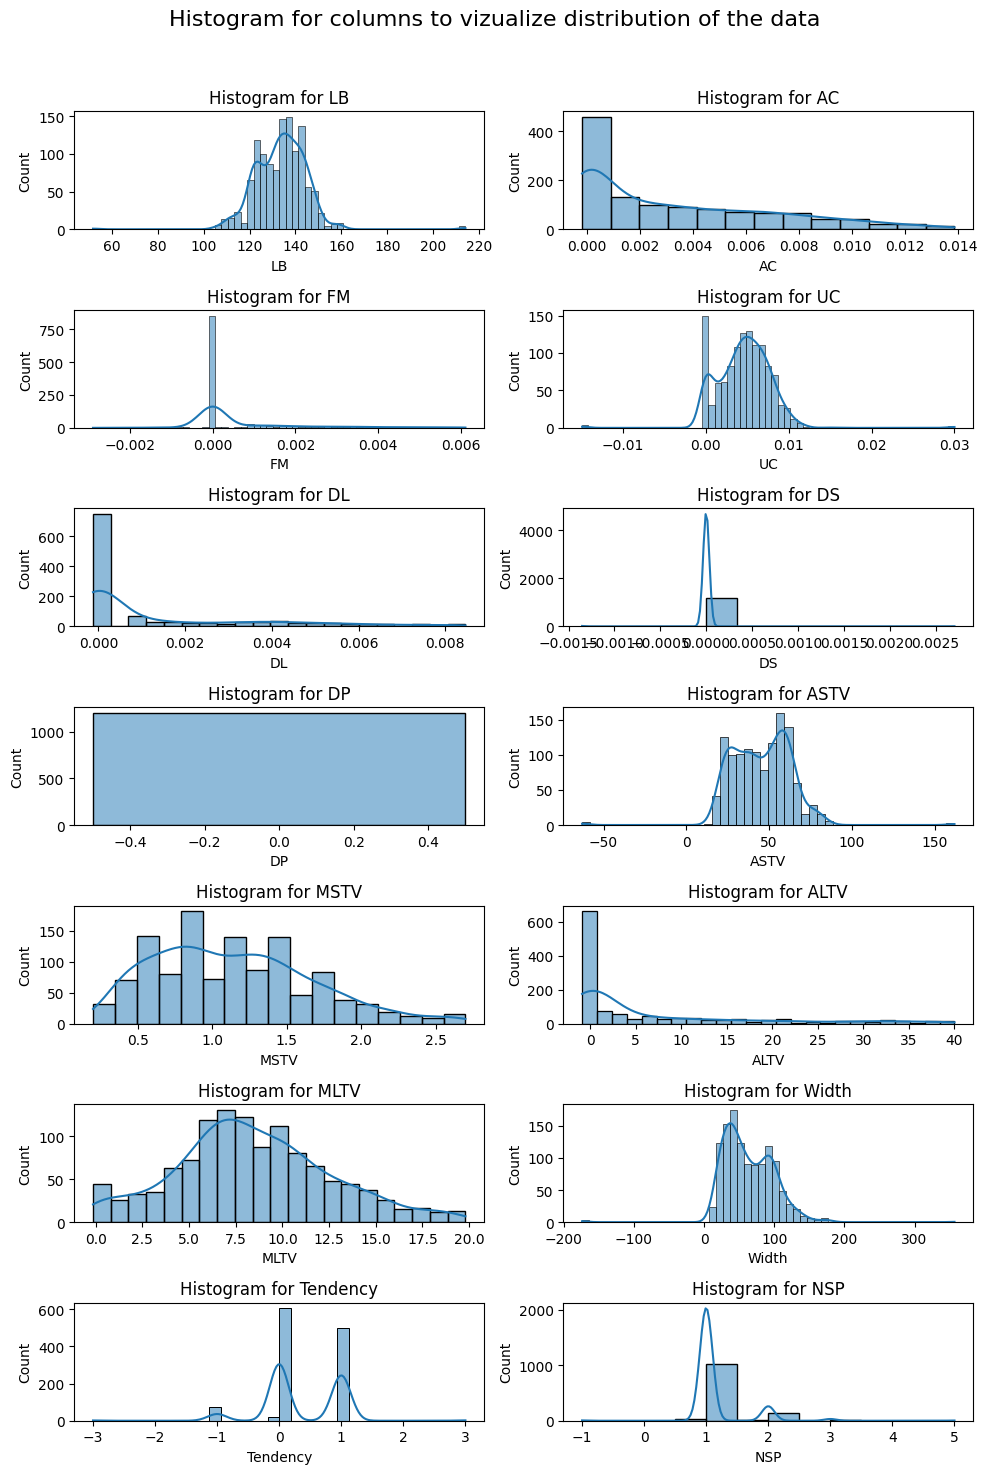

In [79]:
plt.figure(figsize=(10,15))
plt.suptitle('Histogram for columns to vizualize distribution of the data', fontsize=16) 
for idx, col in enumerate(df.columns, 1):
    plt.subplot(7,2,idx)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram for {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

##### <span style='color:#6A9C89'>ii) Use bar charts or pie charts to display the freqeuncy of categories for categorical variables.</span>    

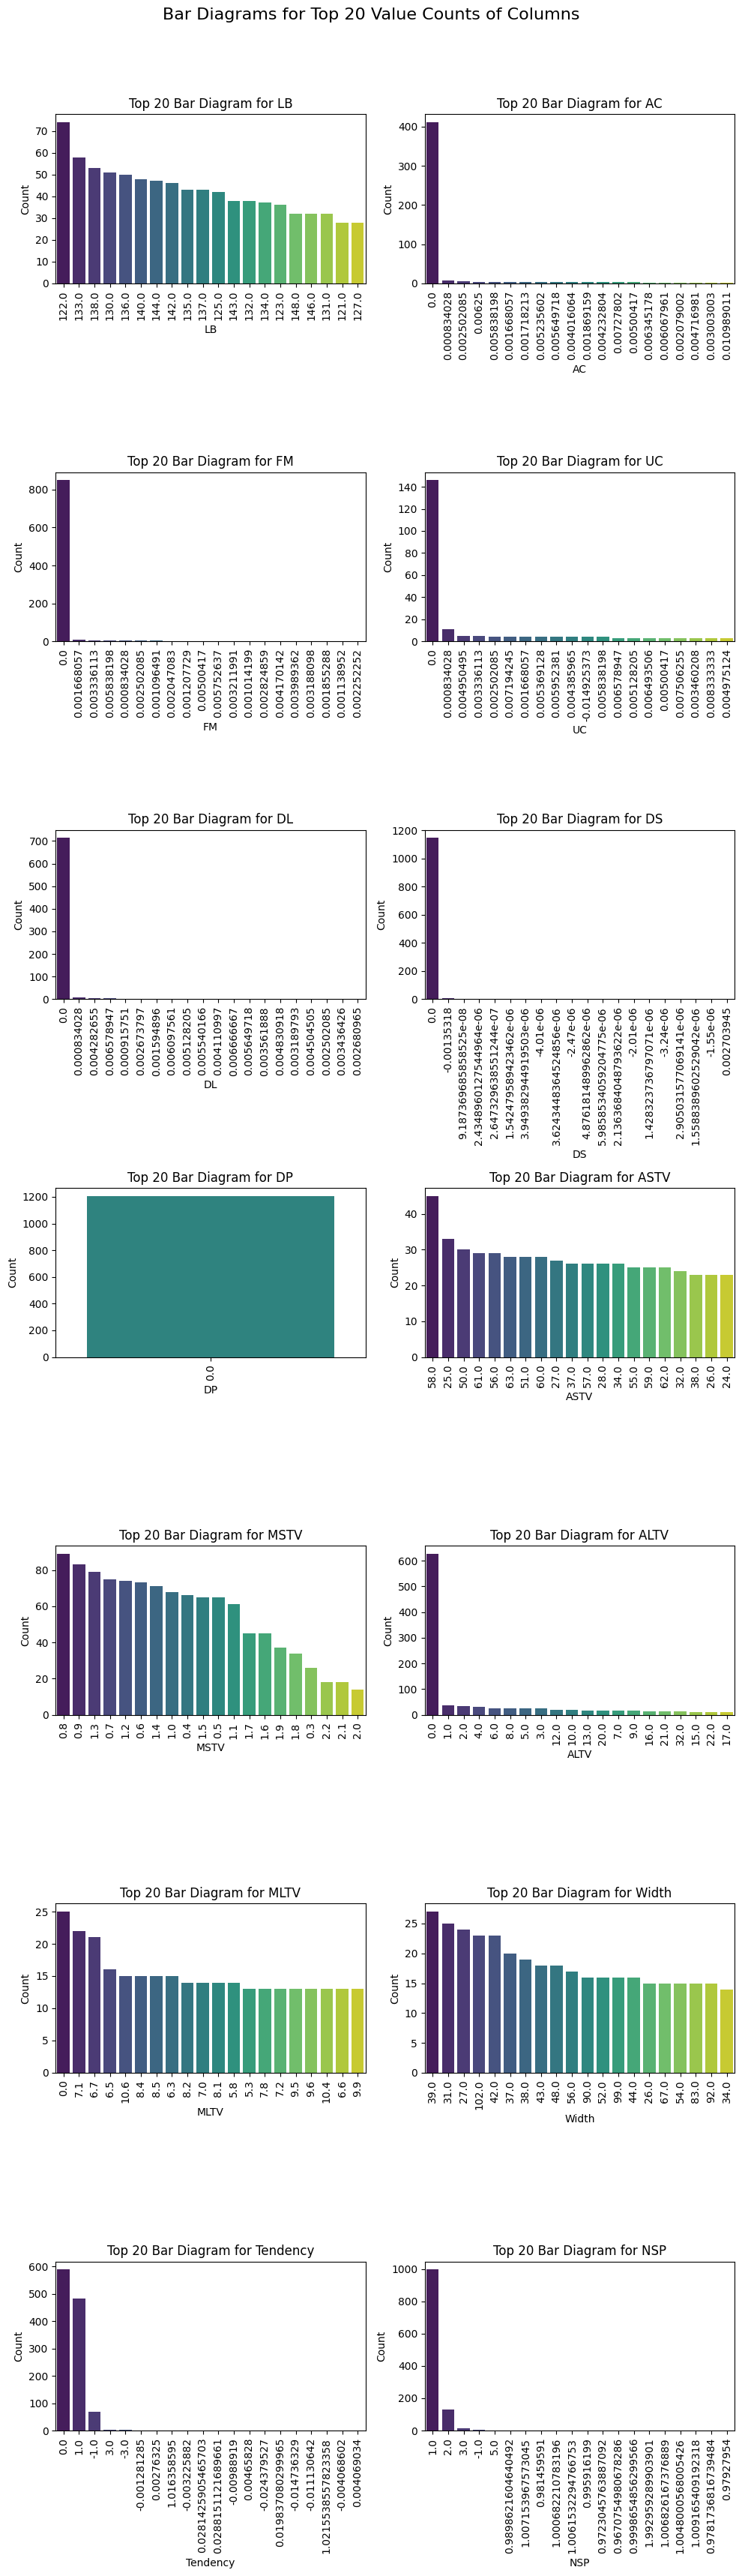

In [111]:
import math

# Calculate the number of rows needed based on the number of columns
n_cols = df.shape[1]
n_rows = math.ceil(n_cols / 2)  # Assuming 2 columns per row

plt.figure(figsize=(10, 5 * n_rows))
plt.suptitle('Bar Diagrams for Top 20 Value Counts of Columns', fontsize=16)

for idx, col in enumerate(df.columns, 1):
    # Get the top 20 value counts
    top_20_values = df[col].value_counts().head(20)
    top_20_categories = top_20_values.index  # Get the category names
    
    plt.subplot(n_rows, 2, idx)
    sns.countplot(
        data=df[df[col].isin(top_20_categories)],  # Filter the dataframe for top 20 categories
        x=col,
        order=top_20_categories,  # Use the order of top 20 categories
        palette='viridis'
    )
    plt.title(f'Top 20 Bar Diagram for {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

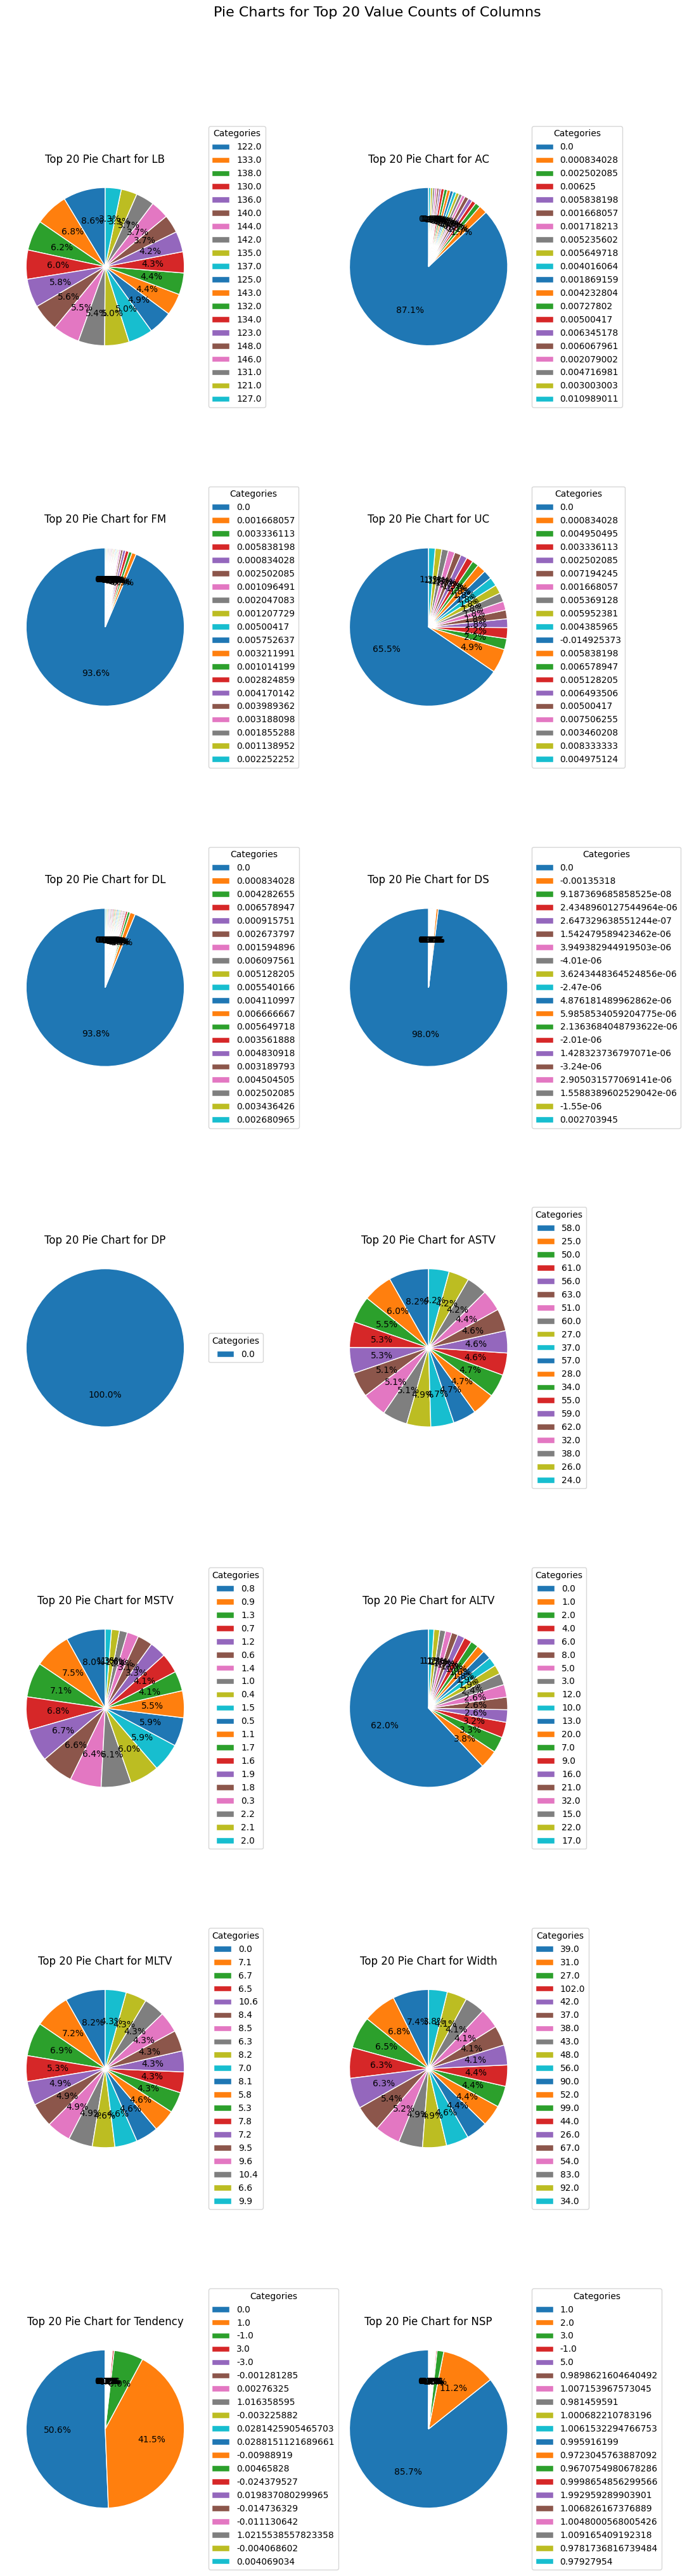

In [114]:
# Calculate the number of rows needed based on the number of columns
n_cols = df.shape[1]
n_rows = math.ceil(n_cols / 2)  # Assuming 2 columns per row

plt.figure(figsize=(12, 6 * n_rows))  # Adjust figure size for pie charts
plt.suptitle('Pie Charts for Top 20 Value Counts of Columns', fontsize=16)

for idx, col in enumerate(df.columns, 1):
    # Get the top 20 value counts
    top_20_values = df[col].value_counts().head(20)
    
    plt.subplot(n_rows, 2, idx)
    wedges, _, autotexts = plt.pie(
        top_20_values,
        autopct='%1.1f%%',  # Show percentages
        startangle=90,  # Start angle for better orientation
        textprops={'fontsize': 10},  # Adjust text size
        wedgeprops={'edgecolor': 'white'}  # Separate segments visually
    )
    
    # Add legend on the side with category labels
    plt.legend(wedges, top_20_values.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(f'Top 20 Pie Chart for {col}')
    plt.ylabel('')  # Remove default y-label for a cleaner look

plt.tight_layout(rect=[0, 0, 0.9, 0.96])  # Adjust layout to fit legends
plt.show()

##### <span style='color:#6A9C89'>iii) Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.</span>

<Figure size 1000x600 with 0 Axes>

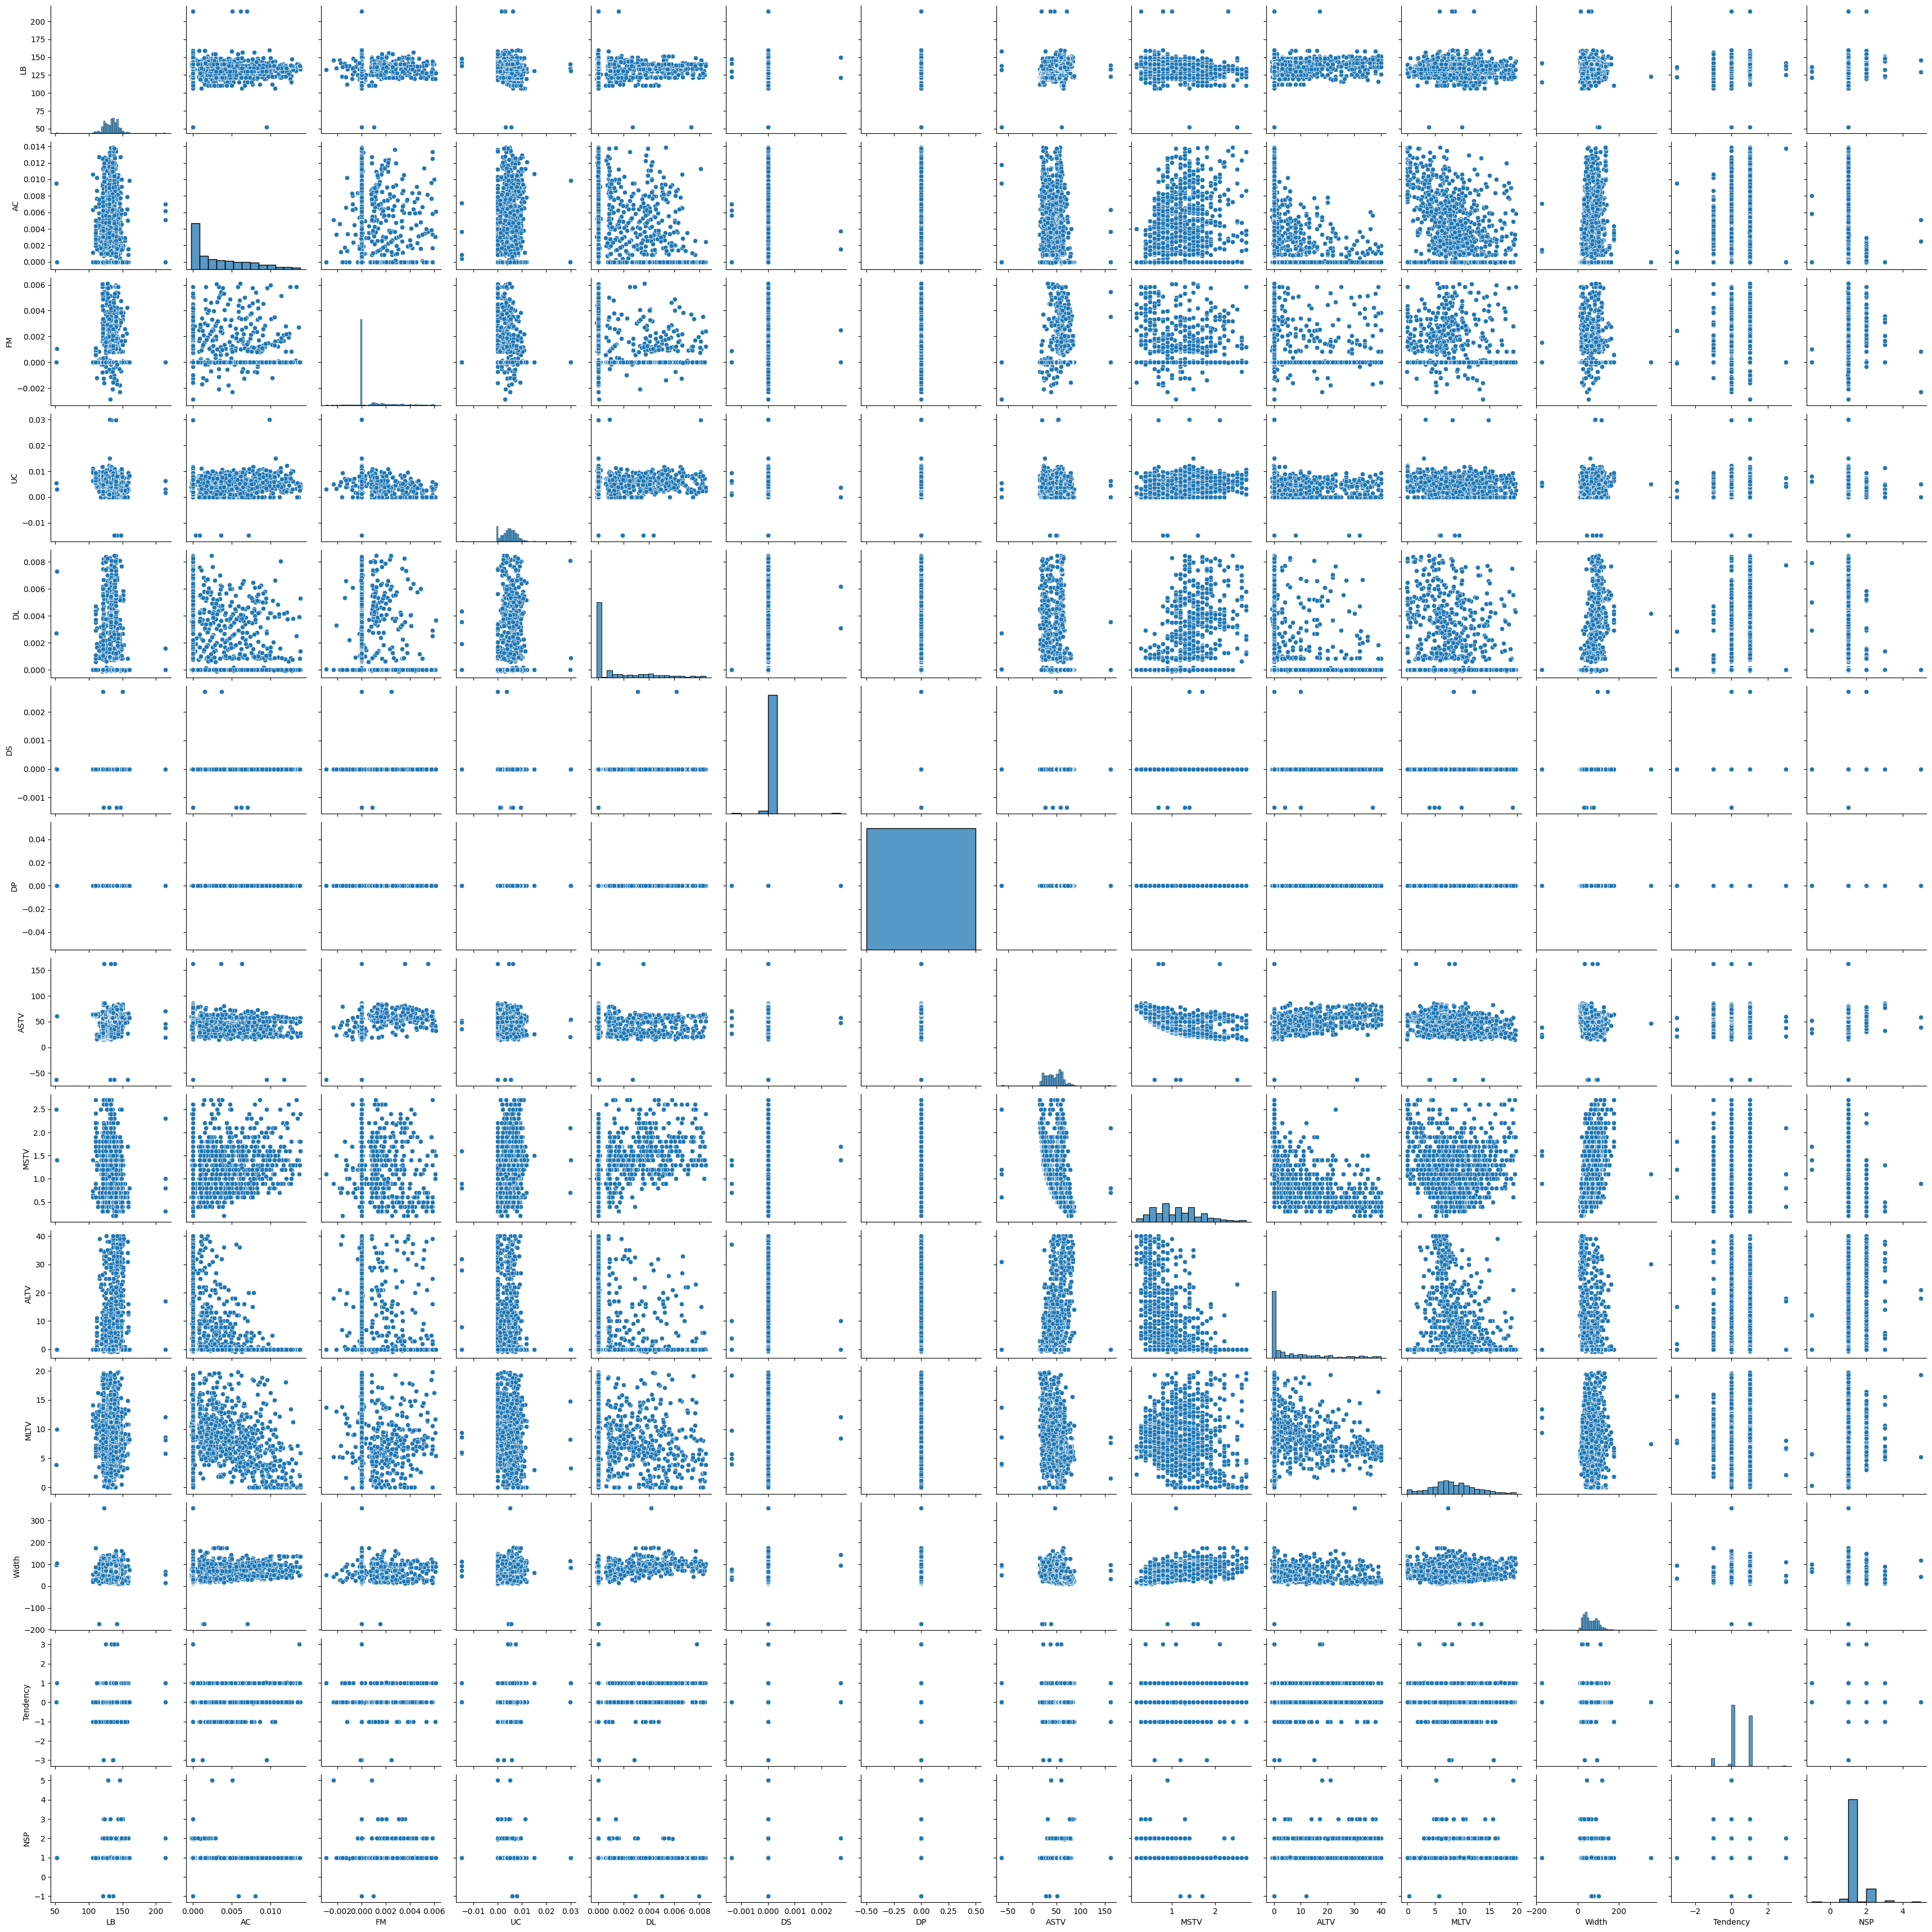

In [115]:
plt.figure(figsize=(10,6))
sns.pairplot(df, palette='viridis')
plt.show()

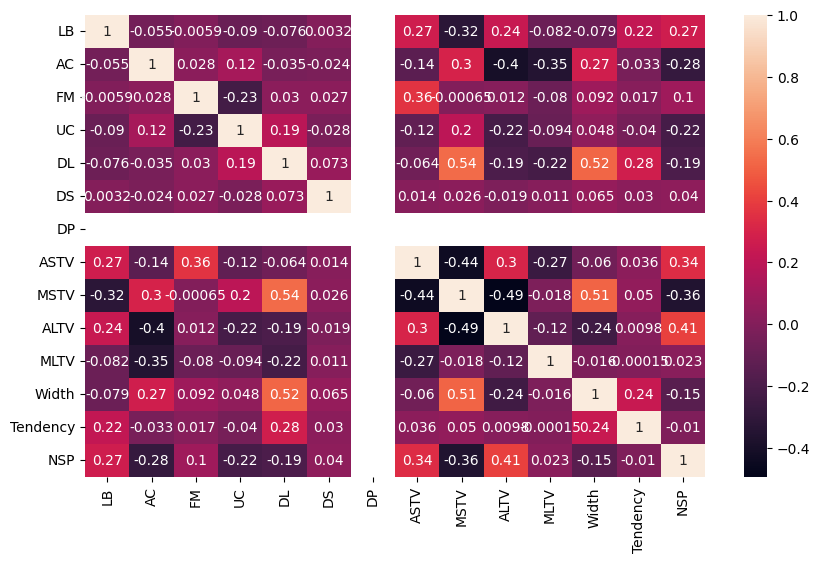

In [120]:
## Let's check for the correlation of the dataset
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [127]:
def correlation(dataset, threshold):
    col_corr = set()  # Set to store column names with high correlation
    corr_matrix = dataset.corr()  # Calculate correlation matrix
    
    for i in range(len(corr_matrix.columns)):  # Loop through columns
        for j in range(i):  # Loop through rows before the diagonal
            if abs(corr_matrix.iloc[i, j]) >= threshold:  # Access with iloc
                col_name = corr_matrix.columns[i]  # Get the column name
                col_corr.add(col_name)  # Add the column name to the set
    return col_corr

In [129]:
## we have so many co-relation value, so we can take 50 as a threshold to see how many columns have more than 50 co-relation
correlation(df, 0.5)

{'MSTV', 'Width'}

In [130]:
## Let's decrease the threshold value and see how many columns are related
correlation(df, 0.4)

{'ALTV', 'MSTV', 'NSP', 'Width'}

In [139]:
## let's put these into separate dataframe
cor_features = list(correlation(df, 0.4)) ## converting them into list for ease.
df[cor_features].head()

ALTV       Width  NSP  MSTV
0   0.0  130.000000  1.0   2.1
1   0.0  130.000000  1.0   2.1
2   6.0   69.920261  3.0   0.5
3   6.0   68.000000  3.0   0.3
4  14.0   24.000000  3.0   0.4

<Figure size 1000x600 with 0 Axes>

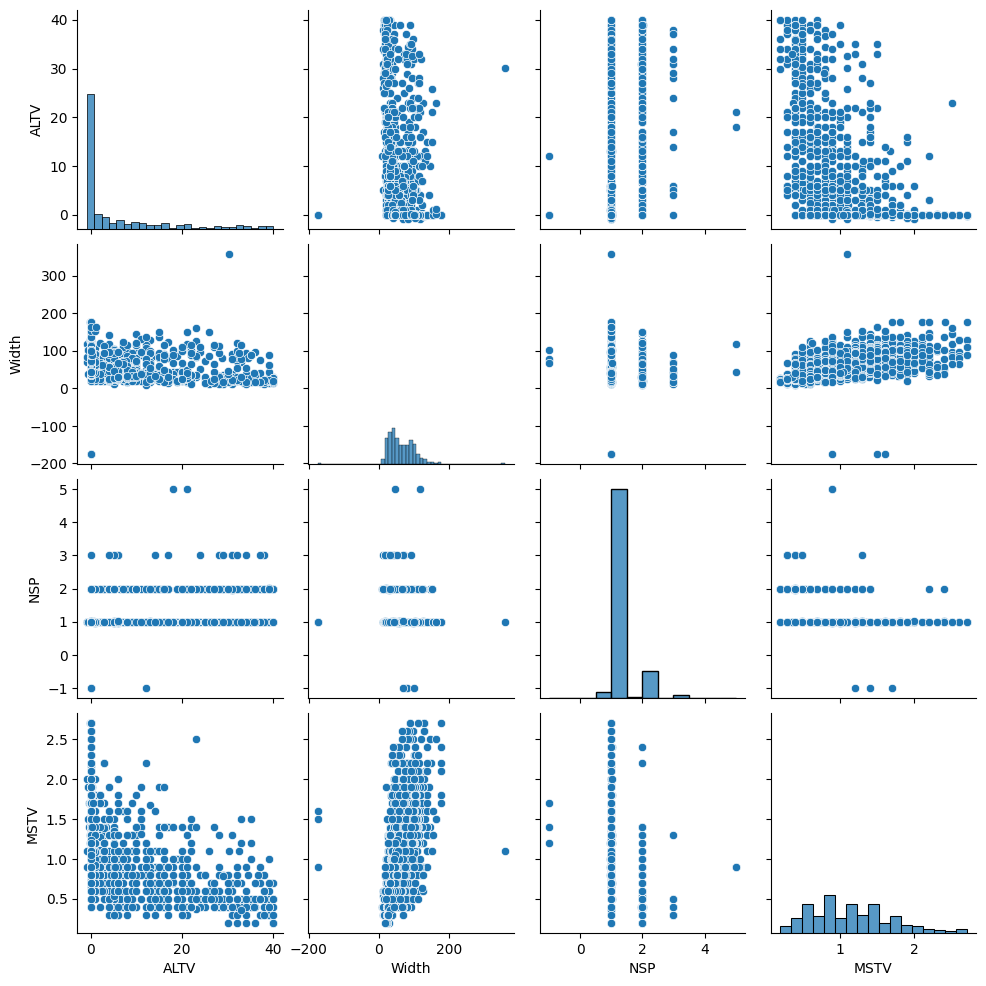

In [146]:
## so, we can see the co-realtion between these columns to have a good vizualization knowledge
plt.figure(figsize=(10,6))
plt.suptitle('Showing all co-relation between those columns which have more than 30% correlation')
sns.pairplot(df[cor_features])
plt.show()

### <span style='color:#6A9C89'>4. Pattern Recognition and Insights</span>

##### <span style='color:#6A9C89'>i) Identify any correlations between variables and discuss their potential implications.</span> 

#### <span style='color:#DEAA79'>Strong Positive Correlation:</span>
##### 1. LB (Baseline Fetal Heart Rate) and Width:
    Suggests that higher baseline fetal heart rates tend to associate with broader histograms, which may indicates variablity in fetal heart acyivity.
##### 2. ALTV (Long-Term Variability) and Width: 
    Indicates that long-term variability is proportional to histogram, reflecting broader variability in fetal heart rate over time.
#### <span style='color:#DEAA79'>Negative Correlations:</span>
##### 1. LB and ASTV (Abnormal Short-Term Variability) 
    A slight negative correlation midght imply that lower baseline fetal rates are associated with abnormal variability.
##### 2. ASTV and ALTV:
    Shows a potential trade-off between short-term and long-term variablity, which may have implications for detecting fetal health patterns.
#### <span style='color:#DEAA79'>Weak Correlations:</span>
##### UC (Utering Contractions), FM (Fetal Movements) and DL (Decelerations)
    Shows weak or no significant correlations with other features. These variables might be influenced by external or independent factors.

#### <span style='color:#DEAA79'>Potential Implications:</span>
    Strong relationships between heart rate measures and variability indeces (e.g, LB, ASTV, ALTV) could be provide insights into fetal health conditions.

##### <span style='color:#6A9C89'>ii) Look for trends or patterns over time if temporal data is available</span>  

#### <span style='color:#DEAA79'>Trends or Patterns</span>
##### If a temporal variable (e.g., time of observation, chronological order) exists, we can analyze it for trends. Unfortunately, the current dataset does not explicitly indicate a temporal column. If such data exists or can be inferred, we can analyze it to:
    Detect changes in heart rate variability over time.
    Identify cyclical patterns in fetal movements or uterine contractions.
    Correlate temporal changes with health outcomes (e.g., NSP categories).


### <span style='color:#6A9C89'>5. Conclusion</span>

##### <span style='color:#6A9C89'>i) Summarize the key insights and patterns discovered through your exploratory analysis.</span>   

### <span style='color:#DEAA79'>Key Insights and Patterns</span>
#### <span style='color:#DEAA79'>1. Variable Distributions:</span>

##### i) Many variables, such as FM (Fetal Movements), DL (Decelerations), and DP (Delay Period)
    are highly skewed, with most values near zero. This indicates infrequent occurrences or specific conditions.
##### ii) LB (Baseline Fetal Heart Rate) and ASTV (Abnormal Short-Term Variability)
    exhibit relatively symmetric distributions, indicating their consistent measurement across samples.
#### <span style='color:#DEAA79'>2. Correlations:</span>

##### i) LB (Baseline Fetal Heart Rate) is positively correlated with Width and ALTV (Long-Term Variability)
    suggesting that a higher baseline heart rate is associated with increased variability.
##### ii) Negative correlations, such as between ASTV and ALTV
    highlight potential trade-offs between short-term and long-term variability measures.
#### <span style='color:#DEAA79'>3. Class Distribution:</span>

##### The categorical variable NSP (Normal, Suspicious, Pathological) is imbalanced, with a majority of samples falling into the "Normal" category. This imbalance could influence predictive models and warrants consideration during classification tasks.
#### <span style='color:#DEAA79'>4. Potential Outliers:</span>

##### Boxplots revealed potential outliers in variables like MSTV (Mean Short-Term Variability) and ALTV, which may represent critical conditions or measurement errors.
#### <span style='color:#DEAA79'>5. Relationship to NSP:</span>

##### Violin plots showed differences in variability measures (e.g., LB, ASTV) across NSP categories, indicating these features might serve as predictors for fetal health outcomes.


##### <span style='color:#6A9C89'>ii) Discuss how these findings could impact decision-making or further analyses.</span>    

### <span style='color:#DEAA79'>Implications for Decision-Making and Further Analyses</span>
#### <span style='color:#DEAA79'>1. Healthcare Decisions:</span>
##### Understanding the relationships between heart rate measures and variability indices can guide healthcare providers in interpreting cardiotocographic readings for timely interventions.
##### The significant variability within ASTV, ALTV, and Width across NSP categories suggests these could be critical metrics for monitoring fetal health.
#### <span style='color:#DEAA79'>2. Feature Engineering:</span>
##### Identifying highly correlated variables (e.g., LB and Width) or independent ones (e.g., FM) can streamline feature selection for predictive models.
##### Skewed variables may require transformation (e.g., logarithmic) or normalization to improve the performance of machine learning models.
#### <span style='color:#DEAA79'>3. Imbalanced Data:</span>

##### The dominance of the "Normal" category in NSP indicates a need for techniques like oversampling or weighted loss functions to ensure robust classification of minority classes.
#### <span style='color:#DEAA79'>4. Time-Series Analysis:</span>

##### If temporal data becomes available, exploring trends in heart rate variability or contraction patterns over time could yield deeper insights into the progression of fetal conditions.
#### <span style='color:#DEAA79'>5. Future Research:</span>

##### Investigating causal relationships or applying advanced models like neural networks could refine the ability to predict pathological outcomes and assist in early diagnosis.
